<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Geral/blob/main/Calculo_pvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
media = 0.
sigma = 2.
numero_sigmas = 3.

In [3]:
from scipy.stats import norm
rv = norm( loc=media, scale=sigma )

In [4]:
# cdf --> cumulative distribution function
pvalue_Esq = rv.cdf( media - numero_sigmas * sigma )
pvalue_Dir = ( 1. - rv.cdf( media + numero_sigmas * sigma ) )
pvalue = ( pvalue_Esq + pvalue_Dir )
print ( "p-value Esq. = {}".format( pvalue_Esq ) )
print ( "p-value Dir. = {}".format( pvalue_Dir ) )
print ( "p-value = {}".format( pvalue ) )

p-value Esq. = 0.0013498980316300933
p-value Dir. = 0.0013498980316301035
p-value = 0.0026997960632601965


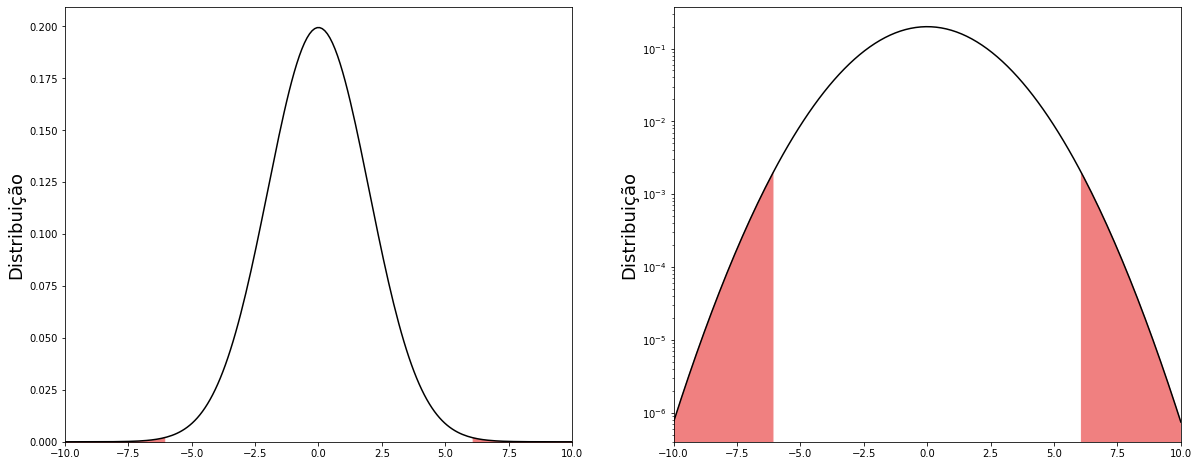

In [5]:
x_min = -10.
x_max =  10.
fig, axes = plt.subplots( 1, 2, figsize=( 2*10, 8 ) )

def plot( ax, x_min, x_max, log=False ):
    X_ = np.linspace( x_min, x_max, 200 )
    ax.plot( X_, rv.pdf( X_ ), 'k-' )
    X_nsigma_Esq_ = X_[ X_ <= ( media - numero_sigmas * sigma ) ]
    X_nsigma_Dir_ = X_[ X_ >= ( media + numero_sigmas * sigma ) ]
    ax.fill_between( X_nsigma_Esq_, 0., rv.pdf( X_nsigma_Esq_ ), color="lightcoral" )
    ax.fill_between( X_nsigma_Dir_, 0., rv.pdf( X_nsigma_Dir_ ), color="lightcoral" )
    ax.set_xlim( x_min, x_max )
    ax.set_ylabel( "Distribuição", fontsize=18 )
    if not log:
        ax.set_ylim( bottom=0. )
    if log:
        ax.set_yscale( 'log' )

plot( axes[ 0 ], x_min, x_max, False )
plot( axes[ 1 ], x_min, x_max, True )